<a href="https://colab.research.google.com/github/kaindoh/Advitisement/blob/master/Advetisement_Reccomendation_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Questions

Create a prediction model that more accurately predicts whether a user will click an Ad or not.

# Problem Statement

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process which would be used for anlaysis.

# Context
We have 1000 rows

We have the following columns:

  'Daily.Time.Spent.on.Site'
  
  'Age'
  
  'Area.Income'
  
  'Daily.Internet.Usage'
  
  'Ad.Topic.Line'
  
  'City'
  
  'Male'
  
  'Country'
  
  'Timestamp'
  
  'Clicked.on.Ad'

# Steps Followed

  1.Loading Data
  
  2.Data Exploration/Cleaning
  
  3.Model Training
  
  4.Model Prediction
  
  5.Model Evaluation
  
# Metrics of success

  Confusionmatrix
  
  Crosstable
  
  Accuracy

# Importing Libaries

In [0]:
# Importing the relvant libaries

library(remotes)
library(pacman)
library(gmodels)
library(outliers)
library(tidyverse)
library(xgboost)
library(corrplot)
library(ggplot2)
library(caret)
library(class)

# Loading The Advertising Dataset

In [0]:
# Loading the dataset and displaying the first 6 rows

df = read.csv("advertising.csv")
head(df) 

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


# Getting the Information of the dataset

In [0]:
# Getting the column names

attributes(df)$names

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"

In [0]:
# Getting the class ofthe data

attributes(df)$class

[1] "data.frame"

In [0]:
# Getting the data type of the individual column

glimpse(df)

Observations: 1,000
Variables: 10
$ Daily.Time.Spent.on.Site <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, ...
$ Age                      <int> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49...
$ Area.Income              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73...
$ Daily.Internet.Usage     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 22...
$ Ad.Topic.Line            <fct> Cloned 5thgeneration orchestration, Monito...
$ City                     <fct> Wrightburgh, West Jodi, Davidton, West Ter...
$ Male                     <int> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...
$ Country                  <fct> Tunisia, Nauru, San Marino, Italy, Iceland...
$ Timestamp                <fct> 2016-03-27 00:53:11, 2016-04-04 01:39:02, ...
$ Clicked.on.Ad            <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...


it gives the data types

In [0]:
# Checking the number of unique columns

cat.columns <- c("Ad.Topic.Line","City","Country","Timestamp")
no <- function(x) {  
    nlevels(x)
  }
  
number <- sapply(select(df, cat.columns), no)
number

Ad.Topic.Line          City       Country     Timestamp 
         1000           969           237          1000

This indicates that most categoric columns are unique  except country

In [0]:
# This the shape of the dataset

dim(df)

[1] 1000   10

This means we have 1000  rows and 10 columns

In [0]:
# Summary of numeric columns

df %>%
  select_if(is.numeric) %>%
  map(~summary(.))

$Daily.Time.Spent.on.Site
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.60   51.36   68.22   65.00   78.55   91.43 

$Age
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   29.00   35.00   36.01   42.00   61.00 

$Area.Income
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13996   47032   57012   55000   65471   79485 

$Daily.Internet.Usage
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.8   138.8   183.1   180.0   218.8   270.0 

$Male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.481   1.000   1.000 

$Clicked.on.Ad
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.5     0.5     1.0     1.0 


This the statistical summary of the numeric columns

# Data Cleaning

In [0]:
# Changing the names of the columns to lower

colnames(df) <- tolower(colnames(df))
colnames(df)

[1] "daily.time.spent.on.site" "age"                     
 [3] "area.income"              "daily.internet.usage"    
 [5] "ad.topic.line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked.on.ad"

In [0]:
# Checking for Missing values

colSums(is.na(df))

daily.time.spent.on.site                      age              area.income 
                       0                        0                        0 
    daily.internet.usage            ad.topic.line                     city 
                       0                        0                        0 
                    male                  country                timestamp 
                       0                        0                        0 
           clicked.on.ad 
                       0

There are no null values

In [0]:
# Checking for duplicates

anyDuplicated(df)

[1] 0

There are no duplicates

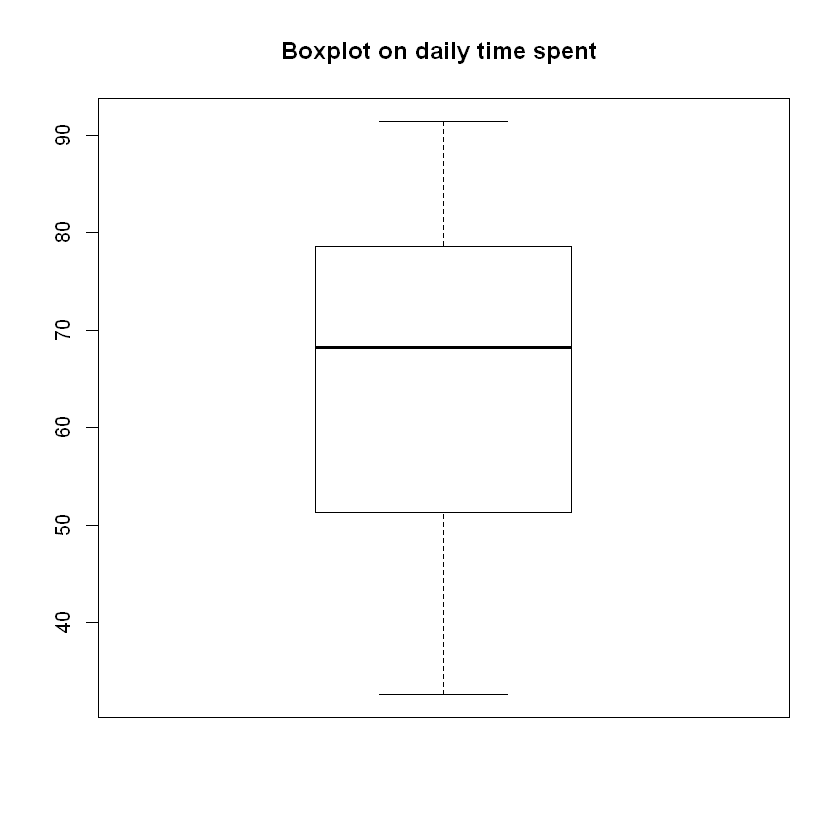

In [0]:
# Checking outliers using boxplots on daily time spent on site
boxplot(df$daily.time.spent.on.site,main = "Boxplot on daily time spent ")


There are no outliers on daily time spent on site

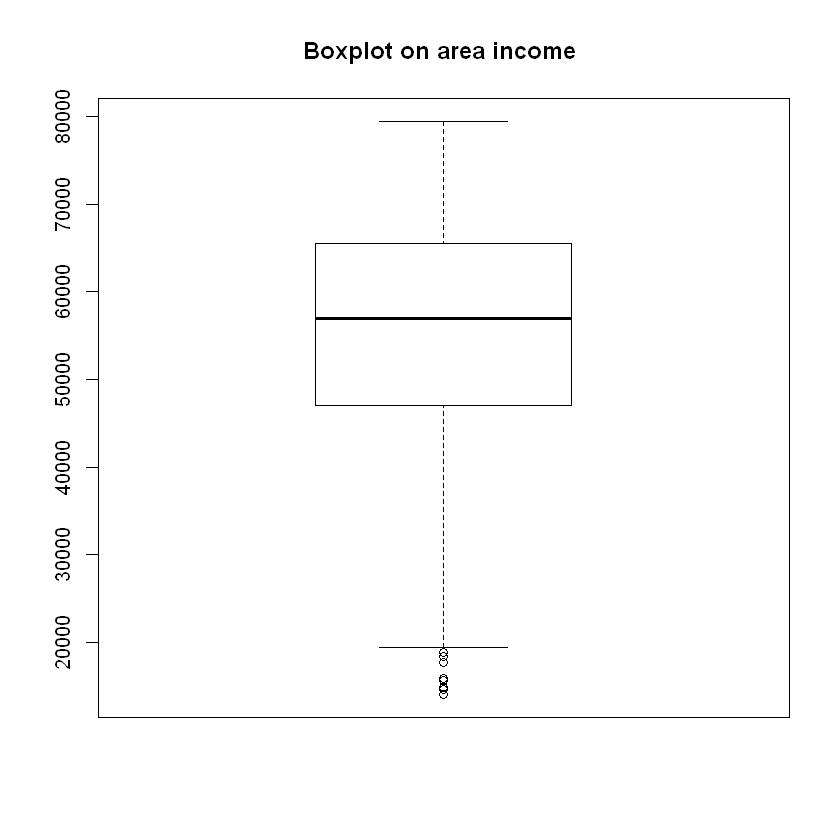

In [0]:
# Checking outliers using boxplots on area income
boxplot(df$area.income,main = "Boxplot on area income ")

There are few outliers on area income

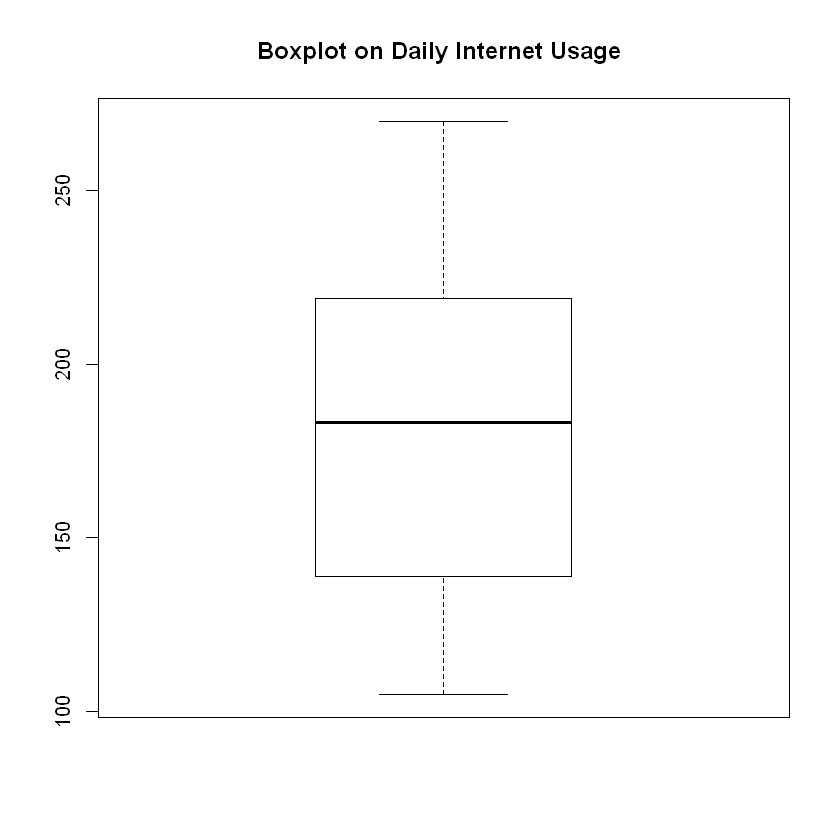

In [0]:
# Plotting boxplots on  Daily Internet Usage
boxplot(df$daily.internet.usage,main = "Boxplot on Daily Internet Usage ")

There are no outliers on  Daily Internet Usage

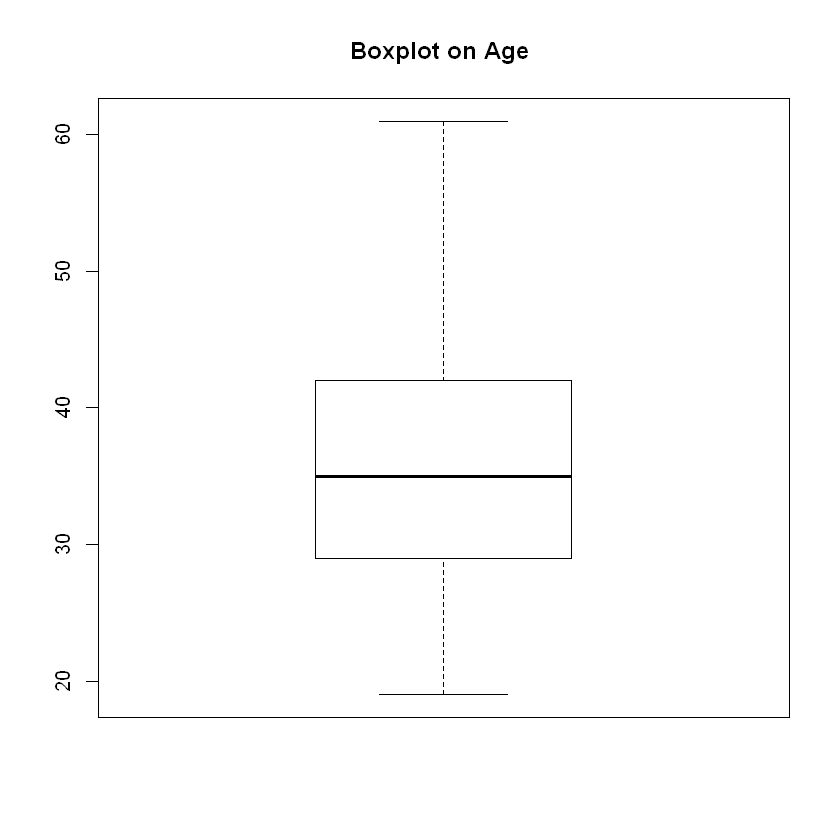

In [0]:
# Plotting boxplots on age
boxplot(df$age,main = "Boxplot on Age ")


There are no outliers on age

# Explorative Data Analysis

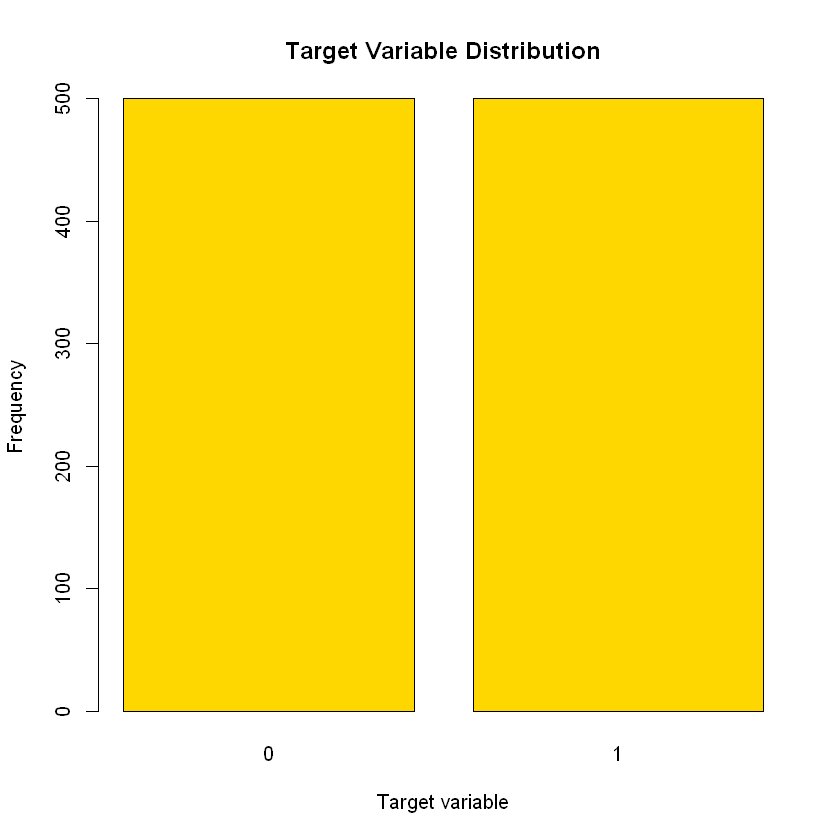

In [0]:
# Plotting barplots of the target column

counts <- table(df$clicked.on.ad)
barplot(counts, main="Target Variable Distribution",xlab="Target variable",ylab = "Frequency",col="gold")

The dataset is balanced

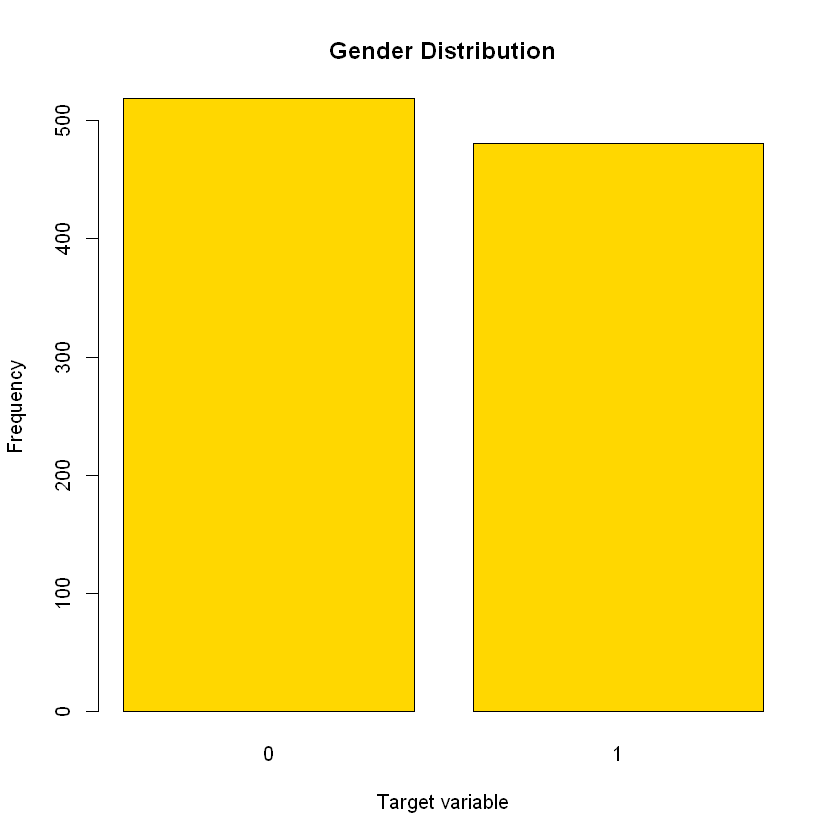

In [0]:
# Plotting barplots of the Genser column

counts <- table(df$male)
barplot(counts, main="Gender Distribution",xlab="Target variable",ylab = "Frequency",col="gold")

The gender of people using the site is almost balance but females are abit higher

In [0]:
# Getting the correlation between the numeric variables

corr_df <- cor(select(df,c("daily.time.spent.on.site" ,"age" ,"area.income","clicked.on.ad")))
corr_df

,daily.time.spent.on.site,age,area.income,clicked.on.ad
daily.time.spent.on.site,1.0000000,-0.3315133,0.3109544,-0.7481166
age,-0.3315133,1.0000000,-0.1826050,0.4925313
area.income,0.3109544,-0.1826050,1.0000000,-0.4762546
clicked.on.ad,-0.7481166,0.4925313,-0.4762546,1.0000000


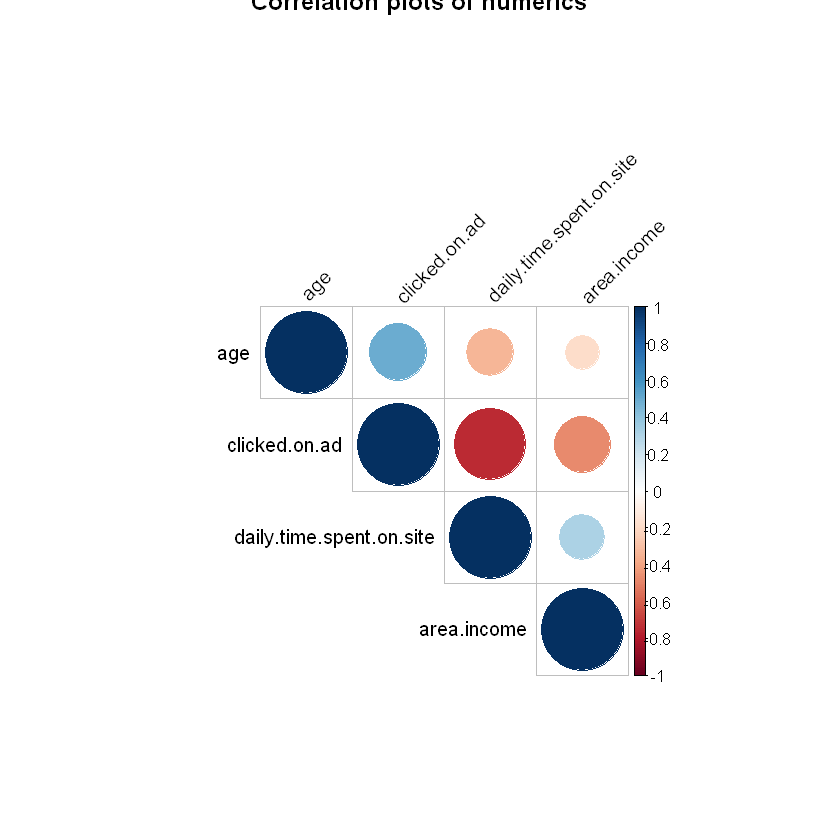

In [0]:
# Showing correlation using correlation plot

corrplot(corr_df, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45,main="Correlation plots of numerics")

In [0]:
library(ggcorrplot)

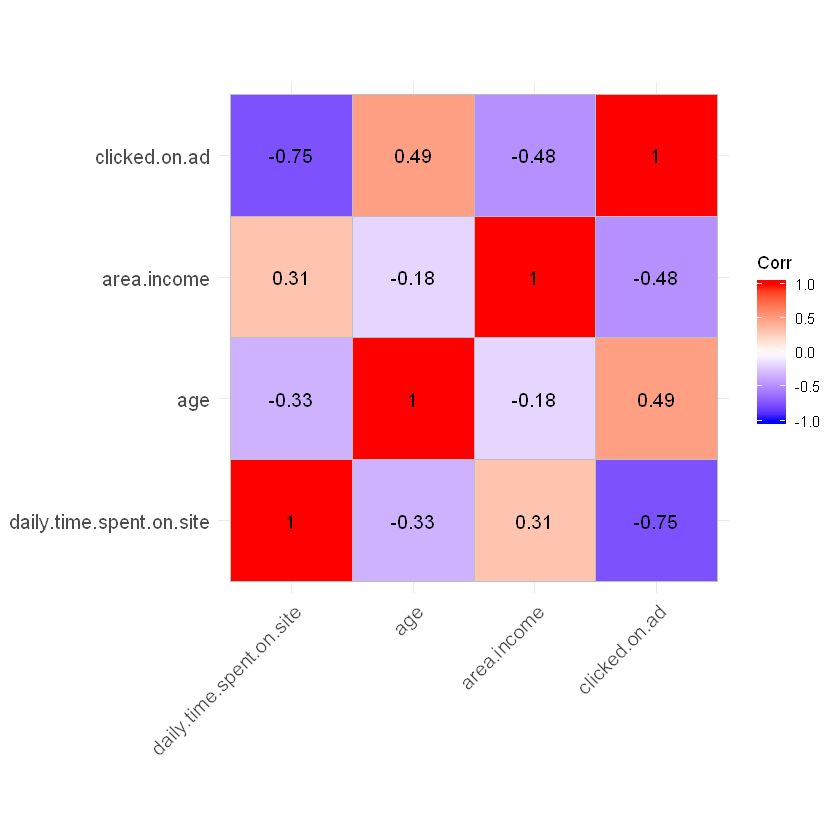

In [0]:
# Plotting heatmap to get more correlation

col<- colorRampPalette(c("blue", "white", "red"))(20)
ggcorrplot(round(corr_df, 2) ,lab = T)


There is essentially high correlation between daily time spent and click on ad

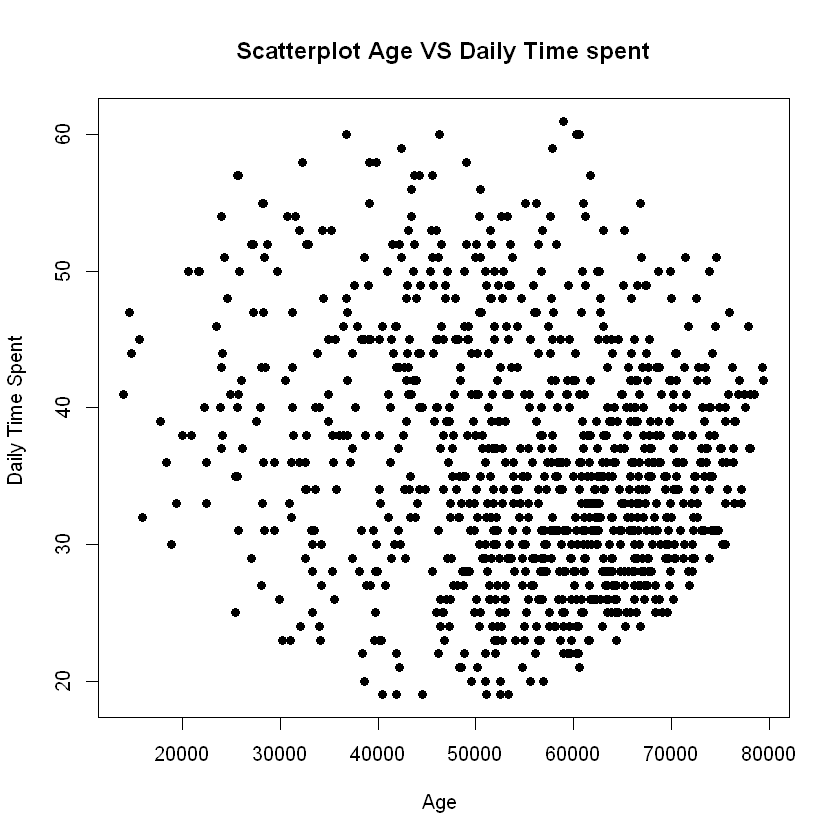

In [0]:
# Plotting a scatter plot between variables

plot(df$area.income, df$age, main="Scatterplot Age VS Daily Time spent",
   xlab="Age ", ylab="Daily Time Spent ", pch=19)

There is no linear relationship between age and daily time spent on site

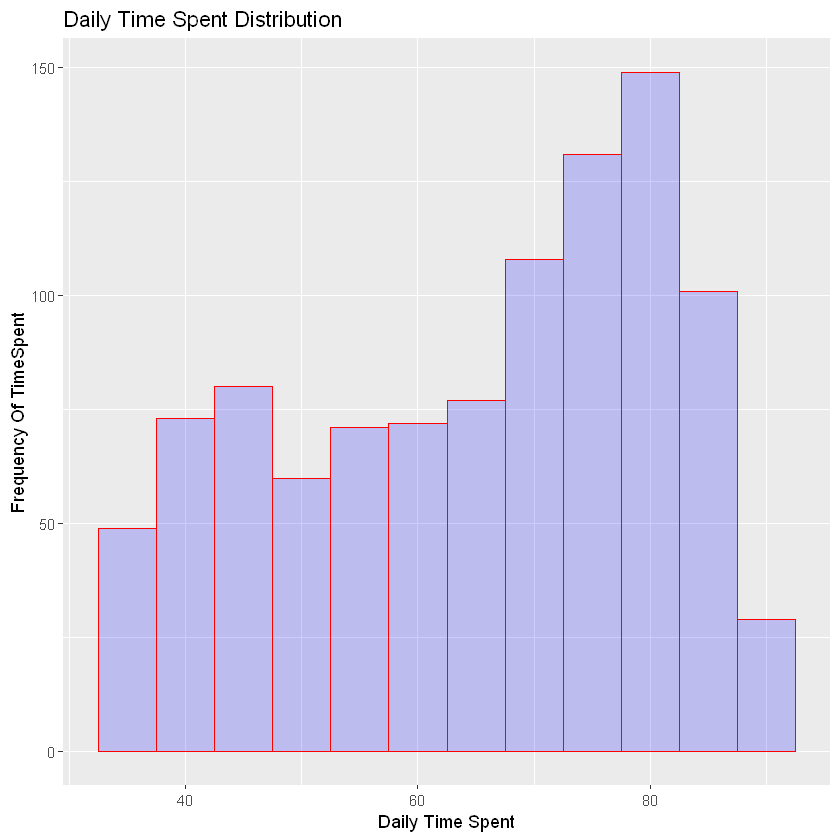

In [0]:
# Plotting a histogram of daily Time Spent

qplot(df$daily.time.spent.on.site,main = "Daily Time Spent Distribution",geom="histogram",
    xlab = "Daily Time Spent",ylab = "Frequency Of TimeSpent",binwidth = 5,fill=I("blue"),col=I("red"), alpha=I(.2),) 

If we assume time spent is in minutes,we have the highest at 80 min which is roughly 1 hr an half

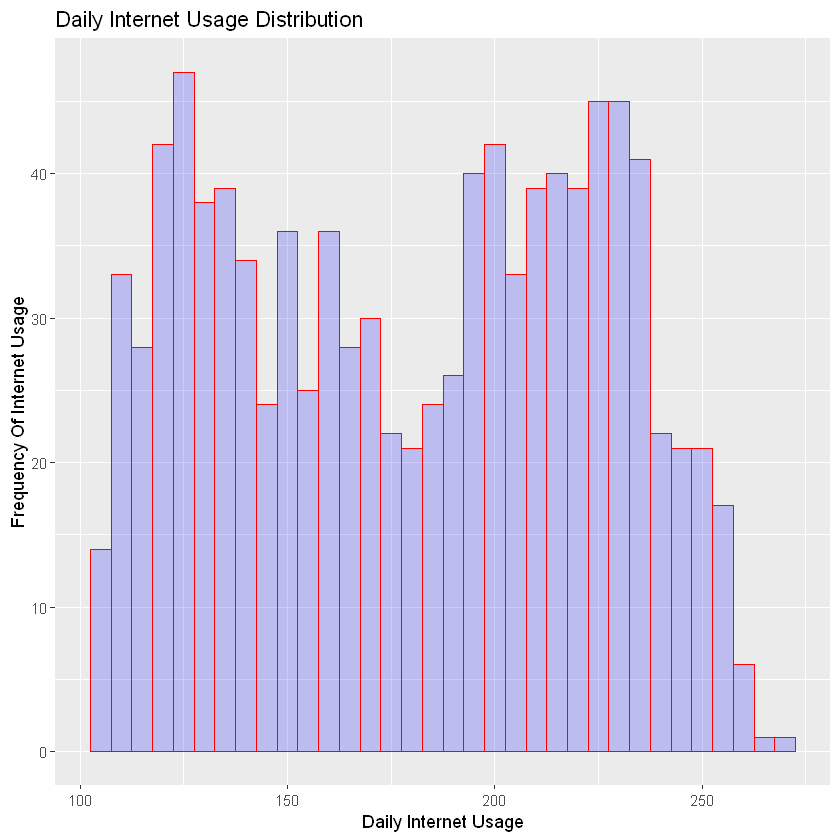

In [0]:
# Plotting a histogram of daily internet Used

qplot(df$daily.internet.usage,main = "Daily Internet Usage Distribution",geom="histogram",
    xlab = "Daily Internet Usage",ylab = "Frequency Of Internet Usage",binwidth = 5,fill=I("blue"),col=I("red"), alpha=I(.2),) 

Most people uses between a range of 100 to 250MBs

# Modelling

In [0]:
# Selecting the columns that will be used for modelling

df1 <- select(df,c("daily.time.spent.on.site" ,"age" ,"area.income","male","clicked.on.ad"))
head(df1)

daily.time.spent.on.site,age,area.income,male,clicked.on.ad
68.95,35,61833.90,0,0
80.23,31,68441.85,1,0
69.47,26,59785.94,0,0
74.15,29,54806.18,1,0
68.37,35,73889.99,0,0
59.99,23,59761.56,1,0


d.topic.line'
'city'
'country'
'timestamp' were not used for modelling

This columns most of the they have single unique variables hence if we do one hot encoding it will bring bring 1000 rows with asingle variable hence it was not necessary to use them.
 

In [0]:
# Making the data to be random ,we shuffle the rows before splitting

rows <- sample(nrow(df1))

df_shuffled <- df1[rows,]
head(df_shuffled)[1:3,]

,daily.time.spent.on.site,age,area.income,male,clicked.on.ad
62,85.84,34,64654.66,1,0
917,54.96,42,59419.78,1,1
554,44.73,35,55316.97,1,1


As we can see the rows are clearly shuffled to avoid overfitting


In [0]:
# Splitting the dataset using caret package

set.seed(100)

index <- createDataPartition(df_shuffled$clicked.on.ad,p=0.8,list=F)

testing  <-  df_shuffled[-index,]
training <- df_shuffled[index,]

x_train = scale(training[,1:4])
x_test = scale(testing[,1:4])
y_train = training[,5]
y_test = testing[,5]

Splitting to training set and test set

In [0]:
# This is alist of some of the available models

paste(names(getModelInfo())[1:50],collapse = ", ")

[1] "ada, AdaBag, AdaBoost.M1, adaboost, amdai, ANFIS, avNNet, awnb, awtan, bag, bagEarth, bagEarthGCV, bagFDA, bagFDAGCV, bam, bartMachine, bayesglm, binda, blackboost, blasso, blassoAveraged, bridge, brnn, BstLm, bstSm, bstTree, C5.0, C5.0Cost, C5.0Rules, C5.0Tree, cforest, chaid, CSimca, ctree, ctree2, cubist, dda, deepboost, DENFIS, dnn, dwdLinear, dwdPoly, dwdRadial, earth, elm, enet, evtree, extraTrees, fda, FH.GBML"

# KNN Classification

In [0]:
#Using knn to to this classification problem

ypred <- knn(train = x_train, test = x_test,
                      cl = y_train, k = 21)
 
 # Evaluating perfomance using crosstable
 
CrossTable(x = y_test, y = ypred,
           prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  200 

 
             | ypred 
      y_test |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        98 |         2 |       100 | 
             |     0.980 |     0.020 |     0.500 | 
             |     0.899 |     0.022 |           | 
             |     0.490 |     0.010 |           | 
-------------|-----------|-----------|-----------|
           1 |        11 |        89 |       100 | 
             |     0.110 |     0.890 |     0.500 | 
             |     0.101 |     0.978 |           | 
             |     0.055 |     0.445 |           | 
-------------|-----------|-----------|-----------|
Column Total |       109 |        91 |       200 | 
             |     0.545 |     0.455 |           | 
-------------|----------

This shows that that it classified 98 correcly and 2 wrongly in the 0 label

This shows that that it classified 89 correcly and 11 wrongly in the 1 label

The total predictions were 200



In [0]:
# Confusion matrix

table(y_test,ypred)

      ypred
y_test  0  1
     0 98  2
     1 11 89

The information in crosstable is well simplified in the confusion matrix

In [0]:
# The accuracy

print(mean(y_test == ypred ))

[1] 0.935


We have an accuracy of 93.5% with 21 neighbours

# Conclusion

The anlysis modelling and evaluation was a success with 93.5% Accuracy which quite high